In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
df=pd.read_csv("london_merged.csv")

In [14]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [15]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [17]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [18]:
df.loc[baking.duplicated]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


In [19]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [20]:
# Convert the 'timestamp' column to proper datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'timestamp' as the index for time series analysis
df = df.set_index('timestamp')

# --- 3. Convert Categories to appropriate types ---
# Convert code/ID columns to integer and then to Pandas 'category' dtype
categorical_cols = ['weather_code', 'is_holiday', 'is_weekend', 'season']

for col in categorical_cols:
    # Convert from float (which read_csv often defaults to) to integer
    df[col] = df[col].astype(int)
    # Convert to category for memory efficiency and proper modeling
    df[col] = df[col].astype('category')

# Display the first few rows with the new structure and check data types
print("### DataFrame Head (First 5 Rows) ###")
print(df.head())
print("\n### DataFrame Info (Data Types) ###")
print(df.info())

### DataFrame Head (First 5 Rows) ###
                     cnt   t1   t2    hum  wind_speed weather_code is_holiday  \
timestamp                                                                       
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0            3          0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0            1          0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0            1          0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0            1          0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5            1          0   

                    is_weekend season  
timestamp                              
2015-01-04 00:00:00          1      3  
2015-01-04 01:00:00          1      3  
2015-01-04 02:00:00          1      3  
2015-01-04 03:00:00          1      3  
2015-01-04 04:00:00          1      3  

### DataFrame Info (Data Types) ###
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cnt           17414 non-null  int64   
 1   t1            17414 non-null  float64 
 2   t2            17414 non-null  float64 
 3   hum           17414 non-null  float64 
 4   wind_speed    17414 non-null  float64 
 5   weather_code  17414 non-null  category
 6   is_holiday    17414 non-null  category
 7   is_weekend    17414 non-null  category
 8   season        17414 non-null  category
dtypes: category(4), float64(4), int64(1)
memory usage: 885.1 KB


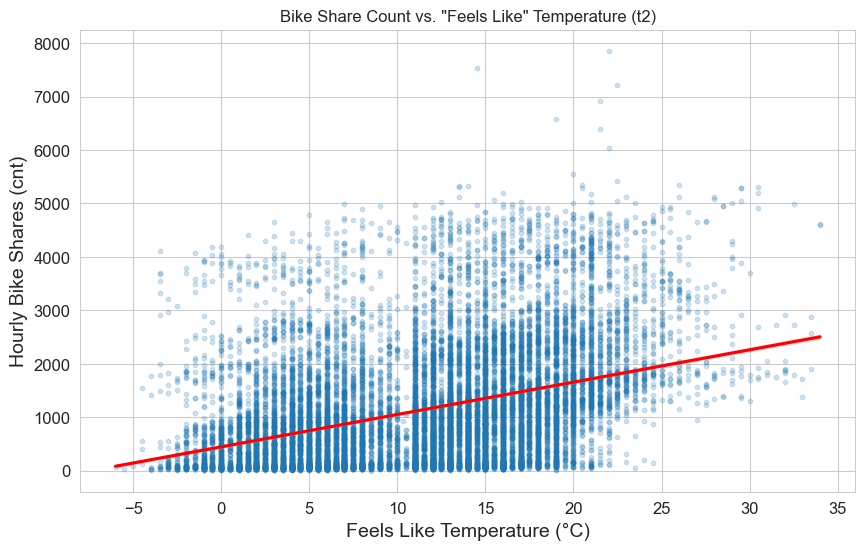

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better visualization
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(
    x='t2',
    y='cnt',
    data=df,
    scatter_kws={'alpha':0.2, 's':10}, # Make points smaller and transparent
    line_kws={'color':'red'}
)
plt.title('Bike Share Count vs. "Feels Like" Temperature (t2)')
plt.xlabel('Feels Like Temperature (°C)')
plt.ylabel('Hourly Bike Shares (cnt)')
plt.show()

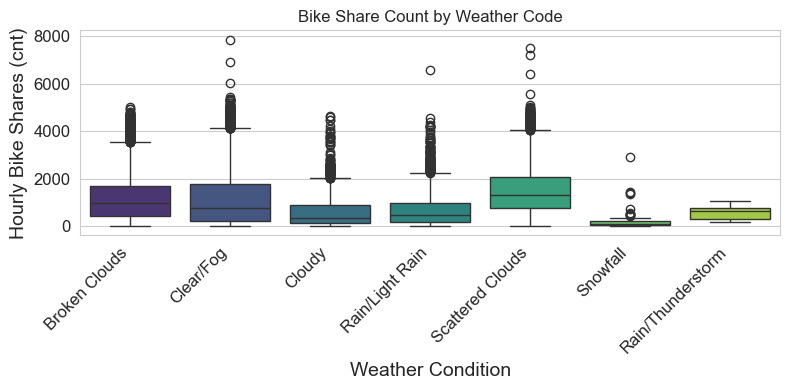

In [25]:
plt.figure(figsize=(8, 4))
# Create a mapping for better labels on the x-axis
weather_map = {
    1: 'Clear/Fog', 2: 'Scattered Clouds', 3: 'Broken Clouds',
    4: 'Cloudy', 7: 'Rain/Light Rain', 10: 'Rain/Thunderstorm',
    26: 'Snowfall', 94: 'Freezing Fog'
}

# The weather_code column is currently a category, which is fine for plotting
sns.boxplot(
    x=df['weather_code'].astype(int).map(weather_map),
    y='cnt',
    data=df,
    palette='viridis'
)
plt.title('Bike Share Count by Weather Code')
plt.xlabel('Weather Condition')
plt.ylabel('Hourly Bike Shares (cnt)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()